In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound
from scipy.optimize import minimize_scalar
from scipy.optimize import line_search
from matplotlib.pyplot import figure

In [2]:
def Rosenbrock( x ):
    x1 = x[0]
    x2 = x[1]
    return (1-x1)**2 + 100*( x2 - x1*x1 )**2


def gradient( x ):
    x1 = x[0]
    x2 = x[1]
    dx1 = 400*x1**3 - 400*x1*x2 + 2*x1 - 2
    dx2 = 200*x2 - 200*x1*x1
    
    res = np.array( [dx1 , dx2 ]).astype(float)

    return res


def hessian( x ):
    
    x1 = x[0]
    x2 = x[1]
    
    h11 = 1200*x1*x1 - 400*x2 + 2
    h12 = -400*x1
    h21 = -400*x1
    h22 = 200
    
    return np.array([ [h11,h12] , [h21,h22] ]).astype(float)

# gradient descent

iteration:  1  reaches  [0.16126202 0.        ]
iteration:  2  reaches  [0.16126202 0.02600544]
iteration:  3  reaches  [0.21133889 0.02600544]
iteration:  4  reaches  [0.21133889 0.04466413]
iteration:  5  reaches  [0.24508249 0.04466413]
iteration:  6  reaches  [0.24508249 0.06006542]
iteration:  7  reaches  [0.27112228 0.06006543]
iteration:  8  reaches  [0.27112228 0.07350729]
iteration:  9  reaches  [0.29257002 0.07350729]
iteration:  10  reaches  [0.29257002 0.08559722]
iteration:  11  reaches  [0.31093081 0.08559722]
iteration:  12  reaches  [0.31093081 0.09667797]
iteration:  13  reaches  [0.32705635 0.09667797]
iteration:  14  reaches  [0.32705635 0.10696585]
iteration:  15  reaches  [0.34147919 0.10696586]
iteration:  16  reaches  [0.34147919 0.11660804]
iteration:  17  reaches  [0.3545563  0.11660804]
iteration:  18  reaches  [0.3545563  0.12571017]
iteration:  19  reaches  [0.36653958 0.12571017]
iteration:  20  reaches  [0.36653958 0.13435126]
iteration:  21  reaches  [0.3

<ipython-input-3-2702ddd63878>:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-0.1, 1)


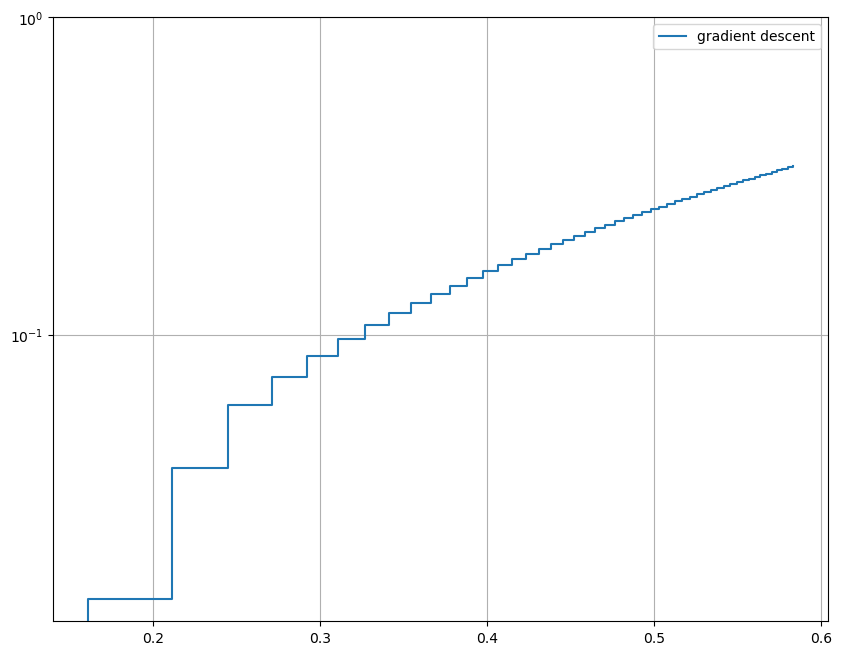

In [3]:
iteration = 0
x1 = 0
x2 = 0
error = 1e5
log = []
X = np.array( [x1,x2]).astype(float)

while iteration < 100:
    iteration = iteration + 1
    
    grad = gradient( X )
    #print(grad)
    #alpha , fc , gc, new_fval, old_fval, new_slope = line_search(Rosenbrock, gradient, X, grad)
    res = minimize_scalar(lambda alpha: Rosenbrock(X -  alpha * gradient(X)))
    alpha = res.x
    
    X = X - alpha * grad
    
    log.append(X)
    print('iteration: ', iteration," reaches ", log[-1])
    
#print('result: ' , log[-1])
print('iteration steps: ' ,  len(log))

figure(figsize=(10, 8), dpi=100)
log = np.array(log)
plt.yscale("log")
plt.plot(log[:,0],log[:,1],label='gradient descent')
plt.legend(loc="upper right")
plt.ylim(-0.1, 1)
plt.yscale('symlog', linthresh=0.05)
plt.grid(True)
plt.show()

# newton's method

<ipython-input-2-68686c64f7ea>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([ [h11,h12] , [h21,h22] ]).astype(float)


iteration:  1  reaches  [1. 0.]
iteration:  2  reaches  [1. 1.]
iteration:  3  reaches  [1. 1.]
iteration:  4  reaches  [1. 1.]
iteration:  5  reaches  [1. 1.]
iteration:  6  reaches  [1. 1.]
iteration:  7  reaches  [1. 1.]
iteration:  8  reaches  [1. 1.]
iteration:  9  reaches  [1. 1.]
iteration:  10  reaches  [1. 1.]
iteration:  11  reaches  [1. 1.]
iteration:  12  reaches  [1. 1.]
iteration:  13  reaches  [1. 1.]
iteration:  14  reaches  [1. 1.]
iteration:  15  reaches  [1. 1.]
iteration:  16  reaches  [1. 1.]
iteration:  17  reaches  [1. 1.]
iteration:  18  reaches  [1. 1.]
iteration:  19  reaches  [1. 1.]
iteration:  20  reaches  [1. 1.]
iteration:  21  reaches  [1. 1.]
iteration:  22  reaches  [1. 1.]
iteration:  23  reaches  [1. 1.]
iteration:  24  reaches  [1. 1.]
iteration:  25  reaches  [1. 1.]
iteration:  26  reaches  [1. 1.]
iteration:  27  reaches  [1. 1.]
iteration:  28  reaches  [1. 1.]
iteration:  29  reaches  [1. 1.]
iteration:  30  reaches  [1. 1.]
iteration:  31  rea

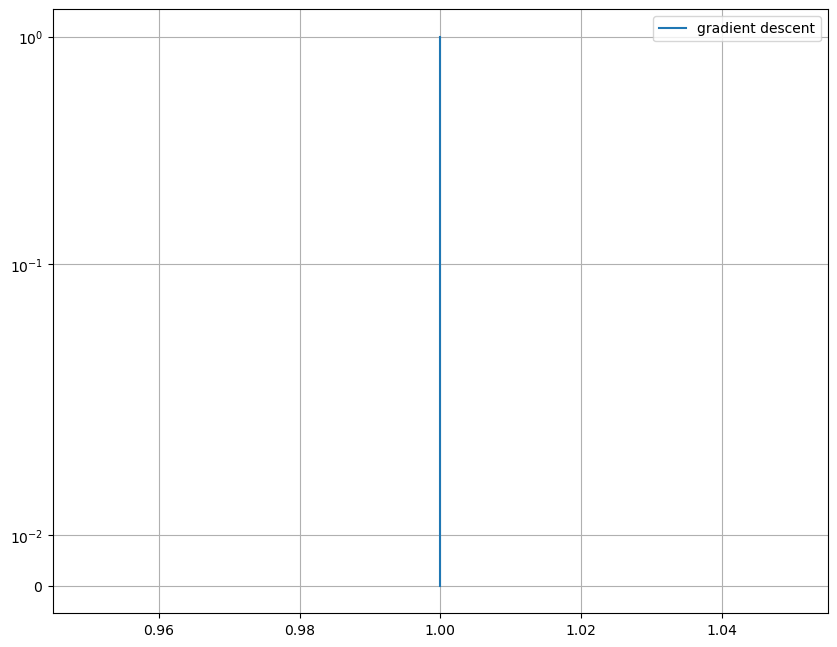

In [6]:
iteration = 0
x1 = 0
x2 = 0
error = 1e5
log = []
X = np.array( [x1,x2]).astype(float)
X = X.reshape(2,1)
while iteration < 100:
    iteration = iteration + 1
    
    #if error<1e-4 :
    #    break;

    X_prev = X
    
    H_inv = np.linalg.inv( hessian( X_prev ) )
    X = X - H_inv@gradient( X_prev )
    error = np.linalg.norm( X - X_prev)
    log.append(X.reshape(2,))
    print('iteration: ', iteration," reaches ", log[-1])
    
#print('result: ' , log[-1])
print('iteration steps: ' ,  len(log))
figure(figsize=(10, 8), dpi=100)
log = np.array(log)
plt.yscale("log")
plt.plot(log[:,0],log[:,1],label='newtons method')
plt.legend(loc="upper right")
#plt.ylim(-0.1, 1)
plt.yscale('symlog', linthresh=0.05)
plt.grid(True)
plt.show()

# BFGS

iteration:  1  reaches  [[0.16126202]
 [0.        ]]
iteration:  2  reaches  [[0.2928363]
 [0.0505949]]
iteration:  3  reaches  [[0.34461573]
 [0.12707842]]
iteration:  4  reaches  [[0.46111375]
 [0.19622896]]
iteration:  5  reaches  [[0.53849588]
 [0.26517211]]
iteration:  6  reaches  [[0.87197912]
 [0.75566081]]
iteration:  7  reaches  [[0.86857957]
 [0.75309121]]
iteration:  8  reaches  [[0.93942513]
 [0.87755509]]
iteration:  9  reaches  [[0.96969255]
 [0.94192235]]
iteration:  10  reaches  [[0.99046443]
 [0.98030376]]
iteration:  11  reaches  [[1.0007949 ]
 [1.00138922]]
iteration:  12  reaches  [[0.99992822]
 [0.99985329]]
iteration:  13  reaches  [[0.99999959]
 [0.99999927]]
iteration:  14  reaches  [[1.]
 [1.]]
iteration:  15  reaches  [[1.]
 [1.]]
iteration:  16  reaches  [[1.]
 [1.]]
iteration:  17  reaches  [[1.]
 [1.]]
iteration:  18  reaches  [[nan]
 [nan]]
iteration:  19  reaches  [[nan]
 [nan]]
iteration:  20  reaches  [[nan]
 [nan]]
iteration:  21  reaches  [[nan]
 [nan

<ipython-input-6-8609ca4f5443>:31: RuntimeWarning: invalid value encountered in true_divide
  B = B + y@y.T /(y.T @ s) - (B @ s) @ (B@s).T / (s.T @ B @ s)


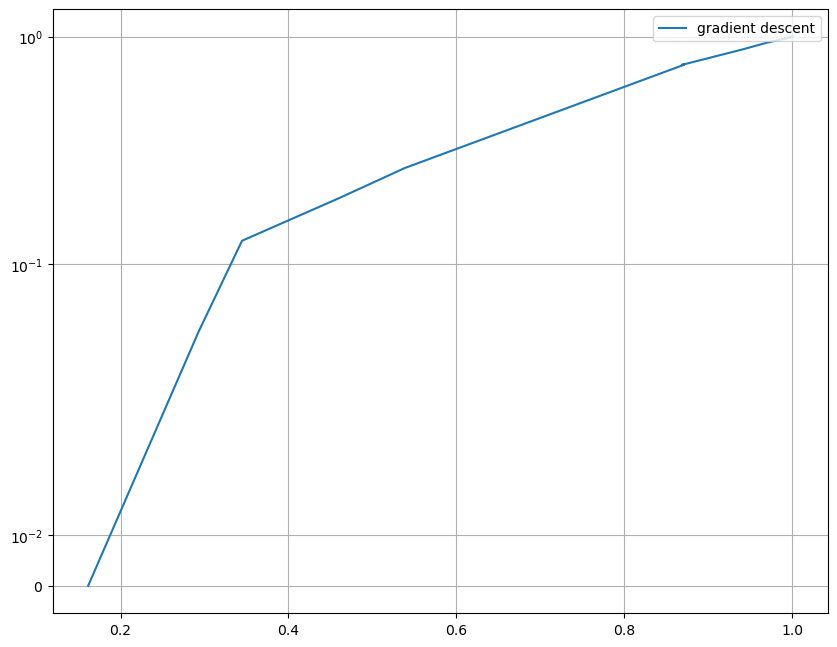

In [6]:
iteration = 0
x1 = 0
x2 = 0
scale = 10.078229999993253
log = []
X = np.array( [x1,x2]).astype(float)
B = np.eye(2)
B = B * scale
#print(scale)
X = X.reshape(2,1)
while iteration < 100:
    iteration = iteration + 1

    grad0 = gradient(X)

    X_prev = X

    p = np.linalg.inv(B) @ grad0

    res = minimize_scalar(lambda alpha: Rosenbrock(X -  alpha * p))
    alpha = res.x

    s = - alpha * p

    X = X_prev + s

    grad1 = gradient(X)

    y = grad1 - grad0
    
    B = B + y@y.T /(y.T @ s) - (B @ s) @ (B@s).T / (s.T @ B @ s)
    
    log.append(X.reshape(2,))
    print('iteration: ', iteration," reaches ", log[-1])
print('iteration steps: ' ,  len(log))
figure(figsize=(10, 8), dpi=100)
log = np.array(log)
plt.yscale("log")
plt.plot(log[:,0],log[:,1],label='BFGS')
plt.legend(loc="upper right")
#plt.ylim(-0.1, 1)
plt.yscale('symlog', linthresh=0.05)
plt.grid(True)
plt.show()
